In [1]:
import tensorflow as tf
import sys
import contextlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"  
tf.get_logger().setLevel("ERROR")

print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available: 1


In [2]:
# Set paths
train_dir = "/kaggle/input/isiccc/data/train"
val_dir = "/kaggle/input/isiccc/data/validation"
test_dir = "/kaggle/input/isiccc/data/test"

# Image parameters
img_size = (128, 128)  
batch_size = 32  

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  
    zoom_range=0.1,     
    horizontal_flip=True,
    vertical_flip=True
)


val_test_datagen = ImageDataGenerator(rescale=1./255)

with open(os.devnull, "w") as f, contextlib.redirect_stdout(f):
    train_generator = train_datagen.flow_from_directory(
        train_dir, target_size=img_size, batch_size=batch_size, class_mode="binary", shuffle=True
    )

    val_generator = val_test_datagen.flow_from_directory(
        val_dir, target_size=img_size, batch_size=batch_size, class_mode="binary", shuffle=False
    )

    test_generator = val_test_datagen.flow_from_directory(
        test_dir, target_size=img_size, batch_size=batch_size, class_mode="binary", shuffle=False
    )

print("Train, Validation, and Test data loaded successfully.")


Train, Validation, and Test data loaded successfully.


In [3]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# ✅ Define VGG11 Model Architecture
def VGG11(input_shape=(128, 128, 3), num_classes=1):
    model = models.Sequential([
        # Convolutional Block 1
        layers.Conv2D(64, (3, 3), padding="same", activation="relu", input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),

        # Convolutional Block 2
        layers.Conv2D(128, (3, 3), padding="same", activation="relu"),
        layers.MaxPooling2D((2, 2)),

        # Convolutional Block 3
        layers.Conv2D(256, (3, 3), padding="same", activation="relu"),
        layers.Conv2D(256, (3, 3), padding="same", activation="relu"),
        layers.MaxPooling2D((2, 2)),

        # Convolutional Block 4
        layers.Conv2D(512, (3, 3), padding="same", activation="relu"),
        layers.Conv2D(512, (3, 3), padding="same", activation="relu"),
        layers.MaxPooling2D((2, 2)),

        # Convolutional Block 5
        layers.Conv2D(512, (3, 3), padding="same", activation="relu"),
        layers.Conv2D(512, (3, 3), padding="same", activation="relu"),
        layers.MaxPooling2D((2, 2)),

        # Fully Connected Layers
        layers.Flatten(),
        layers.Dense(512, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid")  # Binary classification
    ])
    return model

# ✅ Create VGG11 Model
model = VGG11()

# ✅ Compile the Model
model.compile(optimizer=Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

# ✅ Model Summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,546,881 (51.68 MB)

 Trainable params: 13,546,881 (51.68 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

# ✅ Reduce Learning Rate on Plateau (No Logs)
lr_scheduler = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=0  # 🔇 No learning rate updates printed
)

# ✅ Save Best Model's Weights in `.weights.h5`
checkpoint = ModelCheckpoint(
    "best_model.weights.h5",
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min",
    verbose=1
)

# ✅ Train the Model
epochs = 50
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    callbacks=[lr_scheduler, checkpoint]  # ✅ Suppressed LR logs
)

# ✅ Load Best Weights
model.load_weights("best_model.weights.h5")

# ✅ Evaluate Best Model
val_loss, val_acc = model.evaluate(val_generator, verbose=0)
train_loss, train_acc = model.evaluate(train_generator, verbose=0)

# ✅ Print Final Performance
print(f"✅ Train Accuracy: {train_acc:.4f}, Train Loss: {train_loss:.4f}")
print(f"✅ Validation Accuracy: {val_acc:.4f}, Validation Loss: {val_loss:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


354/355 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - accuracy: 0.5946 - loss: 0.6494
Epoch 1: val_loss improved from inf to 0.47791, saving model to best_model.weights.h5
355/355 ━━━━━━━━━━━━━━━━━━━━ 213s 563ms/step - accuracy: 0.5951 - loss: 0.6491 - val_accuracy: 0.7778 - val_loss: 0.4779 - learning_rate: 1.0000e-04
Epoch 2/50
354/355 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - accuracy: 0.7536 - loss: 0.5241
Epoch 2: val_loss did not improve from 0.47791
355/355 ━━━━━━━━━━━━━━━━━━━━ 131s 362ms/step - accuracy: 0.7537 - loss: 0.5240 - val_accuracy: 0.7904 - val_loss: 0.4876 - learning_rate: 1.0000e-04
Epoch 3/50
354/355 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.7728 - loss: 0.4974
Epoch 3: val_loss improved from 0.47791 to 0.47091, saving model to best_model.weights.h5
355/355 ━━━━━━━━━━━━━━━━━━━━ 127s 351ms/step - accuracy: 0.7728 - loss: 0.4974 - val_accuracy: 0.7995 - val_loss: 0.4709 - learning_rate: 1.0000e-04
Epoch 4/50
354/355 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.7778 - lo

In [8]:
from sklearn.metrics import accuracy_score

predictions = model.predict(test_generator)

predicted_labels = np.where(predictions > 0.5, 1, 0)

true_labels = test_generator.classes  

accuracy = accuracy_score(true_labels, predicted_labels)

print(f"Test Accuracy: {accuracy:.4f}")



222/222 ━━━━━━━━━━━━━━━━━━━━ 36s 163ms/step
Test Accuracy: 0.8740


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


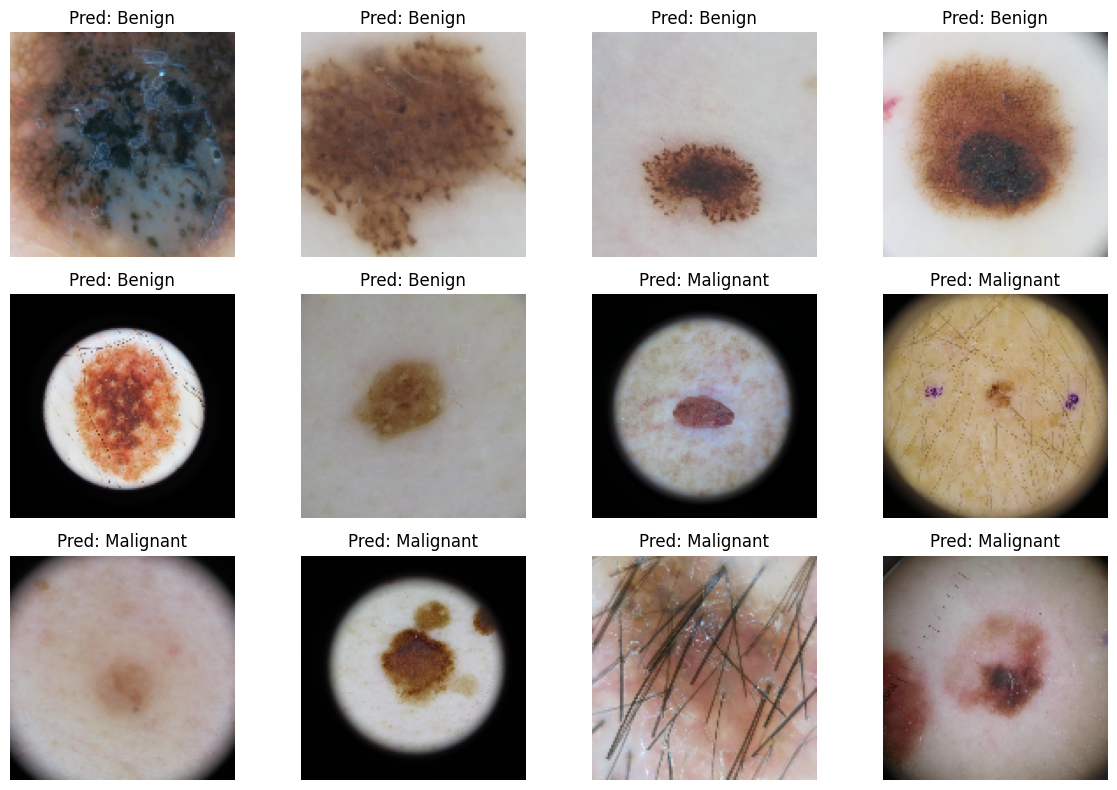

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# ✅ Collect at least 6 benign and 6 malignant images
benign_images, malignant_images = [], []
batch_size = test_generator.batch_size  # Get batch size

while len(benign_images) < 6 or len(malignant_images) < 6:
    # Get next batch of test images and labels
    test_images, test_labels = next(iter(test_generator))
    
    # Get predictions
    predicted_labels = model.predict(test_images)
    predicted_labels = (predicted_labels > 0.5).astype(int).flatten()  # Convert to binary (0 or 1)
    
    # Separate images based on predictions
    for img, pred in zip(test_images, predicted_labels):
        if pred == 0 and len(benign_images) < 6:
            benign_images.append(img)
        elif pred == 1 and len(malignant_images) < 6:
            malignant_images.append(img)

# ✅ Combine selected images
filtered_images = benign_images + malignant_images
filtered_labels = [0] * len(benign_images) + [1] * len(malignant_images)

# ✅ Plot the images
plt.figure(figsize=(12, 8))
for i, (img, label) in enumerate(zip(filtered_images, filtered_labels)):
    plt.subplot(3, 4, i + 1)  # 3 rows, 4 columns
    plt.imshow(img)
    plt.title(f"Pred: {'Malignant' if label else 'Benign'}")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [16]:
from sklearn.metrics import classification_report

# ✅ Get true labels and predictions for the entire test set
y_true = []
y_pred = []

for batch_images, batch_labels in test_generator:
    batch_preds = model.predict(batch_images)  # Get predictions
    batch_preds = (batch_preds > 0.5).astype(int).flatten()  # Convert to binary (0 or 1)
    
    y_true.extend(batch_labels)  # Store true labels
    y_pred.extend(batch_preds)   # Store predicted labels

    if len(y_true) >= test_generator.samples:  # Stop when all samples are covered
        break

# ✅ Generate classification report as a dictionary
report = classification_report(y_true[:test_generator.samples], y_pred[:test_generator.samples], target_names=["Benign", "Malignant"], output_dict=True)

# ✅ Extract Overall Metrics
whole_precision = report["weighted avg"]["precision"]
whole_recall = report["weighted avg"]["recall"]
whole_f1 = report["weighted avg"]["f1-score"]

# ✅ Print Classification Report
print("\n🔹 Classification Report:\n")
print(classification_report(y_true[:test_generator.samples], y_pred[:test_generator.samples], target_names=["Benign", "Malignant"]))

# ✅ Print Overall Precision, Recall, and F1-score in a Clean Format
print("\n🔹 Overall Model Performance:")
print(f"✅  Precision: {whole_precision:.4f}")
print(f"✅  Recall   : {whole_recall:.4f}")
print(f"✅  F1-score : {whole_f1:.4f}")
print(f"✅  Accuracy: {accuracy:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

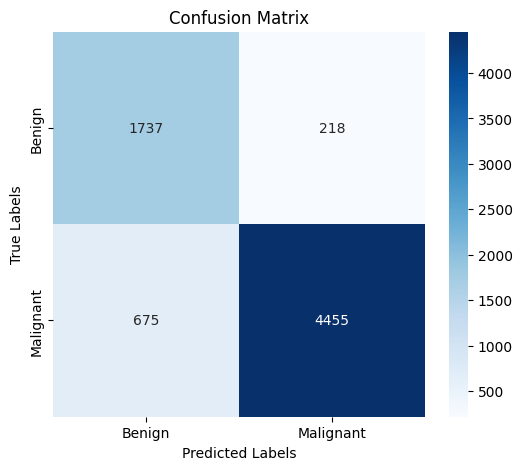

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ✅ Compute confusion matrix
cm = confusion_matrix(y_true[:test_generator.samples], y_pred[:test_generator.samples])

# ✅ Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


222/222 ━━━━━━━━━━━━━━━━━━━━ 36s 163ms/step


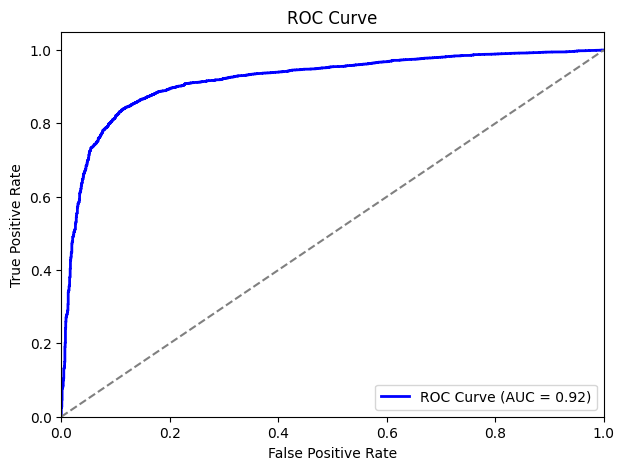

In [12]:
from sklearn.metrics import roc_curve, auc

# ✅ Get model probabilities
y_probs = model.predict(test_generator)  # Get probability scores
y_probs = y_probs[:test_generator.samples]  # Limit to dataset size

# ✅ Compute ROC curve
fpr, tpr, _ = roc_curve(y_true[:test_generator.samples], y_probs)
roc_auc = auc(fpr, tpr)  # Compute AUC score

# ✅ Plot ROC Curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


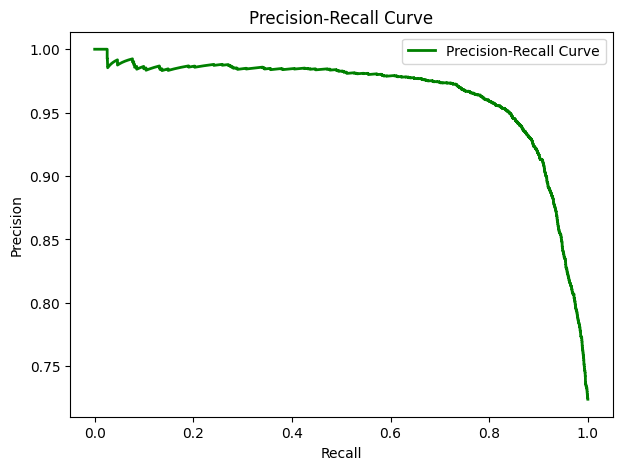

In [13]:
from sklearn.metrics import precision_recall_curve

# ✅ Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_true[:test_generator.samples], y_probs)

# ✅ Plot Precision-Recall curve
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, color="green", lw=2, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.show()


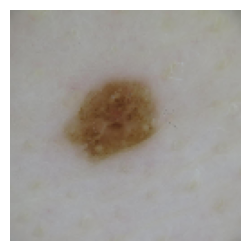

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
🔹 Model Prediction: Benign


In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# ✅ Set Image Path
img_path = "/kaggle/input/isiccc/data/test/benign/ISIC_0053556.jpg"

# ✅ Load and Resize Image to (128, 128, 3)
img = image.load_img(img_path, target_size=(128, 128), color_mode="rgb")
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize

# ✅ Show the Image (Small Size)
plt.figure(figsize=(3, 3))  # Adjust image size
plt.imshow(img)
plt.axis("off")
plt.show()

# ✅ Make Prediction
prediction = model.predict(img_array)

# ✅ Convert to Class Label
predicted_label = "Malignant" if prediction > 0.5 else "Benign"

# ✅ Print Result
print(f"🔹 Model Prediction: {predicted_label}")


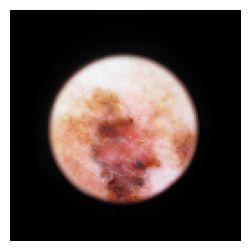

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
🔹 Model Prediction: Malignant


In [25]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# ✅ Set Image Path
img_path = "/kaggle/input/isiccc/data/test/malignant/ISIC_0053470.jpg"

# ✅ Load and Resize Image to (128, 128, 3)
img = image.load_img(img_path, target_size=(128, 128), color_mode="rgb")
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize

# ✅ Show the Image (Small Size)
plt.figure(figsize=(3, 3))  # Adjust image size
plt.imshow(img)
plt.axis("off")
plt.show()

# ✅ Make Prediction
prediction = model.predict(img_array)

# ✅ Convert to Class Label
predicted_label = "Malignant" if prediction > 0.5 else "Benign"

# ✅ Print Result
print(f"🔹 Model Prediction: {predicted_label}")


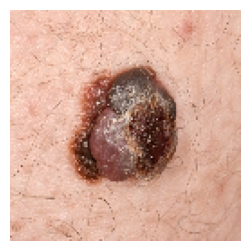

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
🌍 **External Image Detected!** (This image is from Google, not from the dataset)
🔍 **Analyzing Image...**
🧪 **Actual Diagnosis:** Malignant 🩺
🤖 **Model Prediction:** 🦠 Malignant


In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# ✅ Set Image Path (External Image)
img_path = "/kaggle/input/malignant-from-google-photos/c0370929-800px-wm.jpg"

# ✅ Load and Resize Image to (128, 128, 3)
img = image.load_img(img_path, target_size=(128, 128), color_mode="rgb")
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize

# ✅ Show the Image (Small Size)
plt.figure(figsize=(3, 3))  # Adjust image size
plt.imshow(img)
plt.axis("off")
plt.show()

# ✅ Make Prediction
prediction = model.predict(img_array)

# ✅ Convert to Class Label
predicted_label = "🦠 Malignant" if prediction > 0.5 else "✅ Benign"

# ✅ Print Result with Emojis
print("🌍 **External Image Detected!** (This image is from Google, not from the dataset)")
print("🔍 **Analyzing Image...**")
print(f"🧪 **Actual Diagnosis:** Malignant 🩺")
print(f"🤖 **Model Prediction:** {predicted_label}")

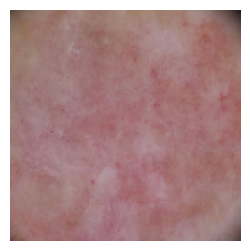

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
🚫 Image skipped: Not enough evidence of skin content.


In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
import matplotlib.pyplot as plt
import cv2

# ✅ Load your skin cancer model
model = tf.keras.models.load_model(r"C:\Users\HAMMAD\Desktop\Skin_Cancer\full_model.h5")  # Update with your model path

# ✅ Set image path (External Image)
img_path = r"C:\Users\HAMMAD\Desktop\Skin_Cancer\assets\malignant.jpg"

# ✅ Function: Skin Pixel Detection using YCrCb
def is_skin_image(img_path, threshold=0.3):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))
    img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    lower = np.array([0, 133, 77], dtype=np.uint8)
    upper = np.array([255, 173, 127], dtype=np.uint8)
    skin_mask = cv2.inRange(img_ycrcb, lower, upper)
    skin_ratio = np.count_nonzero(skin_mask) / (128 * 128)
    return skin_ratio > threshold

# ✅ Function: MobileNet Classifier Content Check
def is_skin_related(img_array):
    mobilenet = MobileNetV2(weights='imagenet')
    img_resized = tf.image.resize(img_array[0], (224, 224))
    img_preprocessed = preprocess_input(np.expand_dims(img_resized.numpy(), axis=0))
    preds = mobilenet.predict(img_preprocessed)
    top_preds = decode_predictions(preds, top=3)[0]
    labels = [label.lower() for (_, label, _) in top_preds]
    skin_keywords = ['skin', 'lesion', 'mole', 'spot', 'scar', 'tumor']
    return any(any(keyword in label for keyword in skin_keywords) for label in labels)

# ✅ Load and Resize Image for Both Checks
img = image.load_img(img_path, target_size=(128, 128), color_mode="rgb")
img_array = image.img_to_array(img)
img_array_expanded = np.expand_dims(img_array, axis=0)
img_array_normalized = img_array_expanded / 255.0

# ✅ Show the Image
plt.figure(figsize=(3, 3))
plt.imshow(img)
plt.axis("off")
plt.show()

# ✅ Check for skin and content
if is_skin_image(img_path) and is_skin_related(img_array_expanded):
    prediction = model.predict(img_array_normalized)
    predicted_label = "🦠 Malignant" if prediction > 0.5 else "✅ Benign"
    
    print("🌍 **External Image Detected!** (This image is from Google, not from the dataset)")
    print("🔍 **Analyzing Image...**")
    print(f"🧪 **Actual Diagnosis:** Malignant 🩺")
    print(f"🤖 **Model Prediction:** {predicted_label}")
else:
    print("🚫 Image skipped: Not enough evidence of skin content.")
